# FDA_practice

# Part 1

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import scipy as sp 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP tools
import nltk

In [2]:
# The data path of input file
data_path = "./Reviews.csv"

# Read csv file to pandas dataframe
pd_data = pd.read_csv(data_path)

## 1. Top-10 Reviewer

In [3]:
pd_data = pd_data[:10000]
a = pd_data.groupby(['UserId','ProfileName']).count()
b = pd_data.groupby(['UserId','ProfileName']).mean()
d = {'Score count':a['Score'],'Score mean':b['Score']}
count = pd.DataFrame(d)
count.sort_values(by='Score count',ascending=False)[:10]

,,Score count,Score mean
UserId,ProfileName,,
A1Z54EM24Y40LL,c2,17,3.882353
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
A35R32TA60XD57,M. Torma,9,4.111111
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
A3NHUQ33CFH3VM,Citizen John,7,3.142857
A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
A26NFIQ7KWI8Y7,kt rose,6,2.666667


## 2. Plot score distribution for the user with the most number of reviews

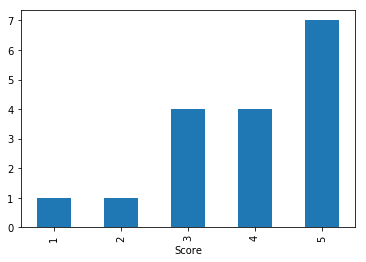

In [4]:
most = count.sort_values(by='Score count',ascending=False).iloc[0]
dist = pd_data[pd_data.UserId == most.name[0]]
plot = dist.groupby('Score').count()['Id']
plot.plot(kind='bar')

## 3. Plot pandas Series DataFrame (Time->Date)

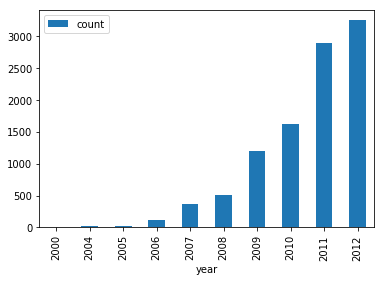

In [5]:
import time
year = pd_data['Time'].apply(lambda x : time.gmtime(x).tm_year)
d = {'year' : year, 'count' : year.index}
e = pd.DataFrame(d)
e.groupby('year').count().plot(kind='bar')

## 4. Plot HeatMap using seaborn

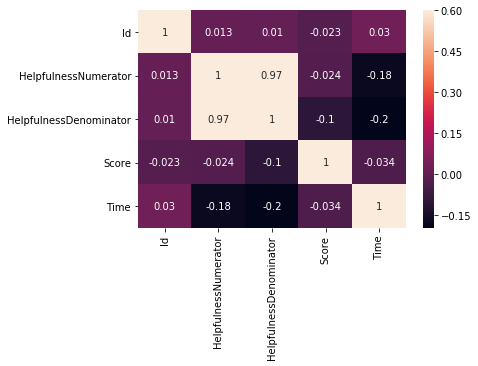

In [6]:
corr = pd_data.corr()
sns.heatmap(corr, annot=True, vmax=0.6)

## 5. Helpful percent

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51e5510898>]],
      dtype=object)

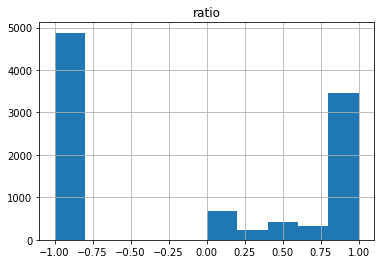

In [7]:
ratio = []
for i in pd_data.index:
    a = pd_data['HelpfulnessNumerator'][i]
    b = pd_data['HelpfulnessDenominator'][i]
    if a == 0 and b == 0:
        ratio.append(-1)
    if a <= b and b != 0:
        ratio.append(a/b)
d = {'ratio':ratio}
e = pd.DataFrame(d)
e.hist()

# Part 2

## dataset : https://www.kaggle.com/lava18/google-play-store-apps

In [8]:
import numpy as np # linear algebra
import scipy as sp 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP tools
import nltk

In [9]:
path = './googleplaystore.csv'
data = pd.read_csv(path)

## Mean rating of each category

In [10]:
a = data.groupby('Category').count()
b = data.groupby('Category').mean()
d = {'App count':a['App'], 'Rating mean':b['Rating']}
review = pd.DataFrame(d)
review.sort_values(by='App count',ascending=False)

,App count,Rating mean
Category,,
FAMILY,1972,4.192272
GAME,1144,4.286326
TOOLS,843,4.047411
MEDICAL,463,4.189143
BUSINESS,460,4.121452
PRODUCTIVITY,424,4.211396
PERSONALIZATION,392,4.335987
COMMUNICATION,387,4.158537
SPORTS,384,4.223511


## Rating distrubition of category with the most amount of Apps 

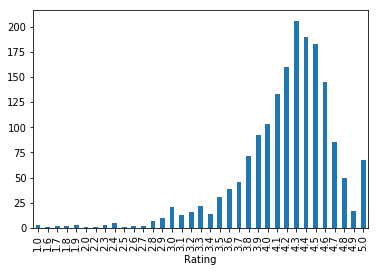

In [11]:
most = review.sort_values(by='App count',ascending=False).iloc[0]
family = data[data.Category == most.name]
family.groupby('Rating').count()['App'].plot(kind='bar')

## Correlation

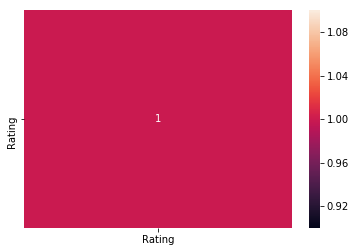

In [12]:
corr = data.corr()
sns.heatmap(corr, annot=True)